<a href="https://colab.research.google.com/github/joaopedrodacostacarvalho/IA/blob/mj_IA/AV_1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artigo 1

## “Predicting At-Risk Students Using Clickstream Data in the Virtual Learning Environment”

### Dataset: OULAD (Open University Learning Analytics Dataset)
### Link: https://analyse.kmi.open.ac.uk/open-dataset?utm_source

### ETAPA 1 — Preparar o ambiente no Google Colab

In [1]:
!pip install pandas numpy scikit-learn tensorflow seaborn matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


### ETAPA 2 — Carregar o dataset OULAD

In [ ]:
info = pd.read_csv('/content/drive/MyDrive/Período 3/ia/AV-I/studentInfo.csv')
vle = pd.read_csv('/content/drive/MyDrive/Período 3/ia/AV-I/studentVle.csv')

print('Tabelas carregadas:')
print('studentInfo:', info.shape)
print('studentVle:', vle.shape)

clicks = vle.groupby('id_student')['sum_click'].sum().reset_index()
clicks.rename(columns={'sum_click': 'total_clicks'}, inplace=True)

df = info.merge(clicks, on='id_student', how='left')
df['final_result'] = df['final_result'].map({
    'Withdrawn': 0,
    'Fail': 0,
    'Pass': 1,
    'Distinction': 1
})

df = df.dropna(subset=['final_result'])
df.head()


Tabelas carregadas:
studentInfo: (32593, 12)
studentVle: (10655280, 6)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_clicks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,1,934.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1,1435.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,0,281.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,1,2158.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1,1034.0


### ETAPA 3 — Pré-processamento e divisão treino/teste

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

X = df.drop(columns=['final_result', 'id_student'])
y = df['final_result']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


### ETAPA 4 — Modelos e Métricas


1.   Árvore Aleatória (RandomForest)
2.   Rede Neural (Deep Learning)

In [ ]:
# ============================================================
# 🔹 1. Árvore Aleatória (RandomForest)
# ============================================================
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ============================================================
# 🔹 2. Deep Learning (Rede Neural)
# ============================================================
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2, verbose=0)
y_pred_dl = (model.predict(X_test) > 0.5).astype("int32")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


### ETAPA 5 — Avaliação das Métricas


📊 Resultados — Random Forest
Acurácia: 0.8100838617304152
Precisão: 0.7818181818181819
Recall: 0.8290727902946274
F1-score: 0.8047523919671958

Matriz de Confusão:


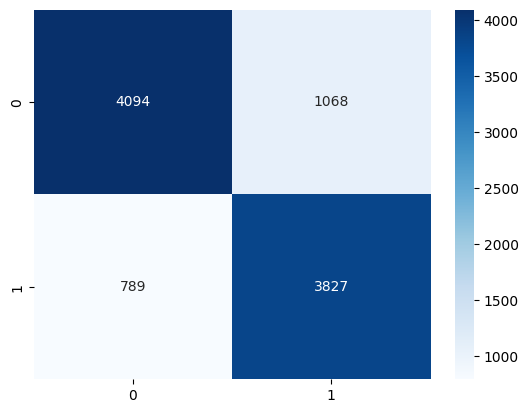


📊 Resultados — Deep Learning
Acurácia: 0.5279198200040908
Precisão: 0.0
Recall: 0.0
F1-score: 0.0

Matriz de Confusão:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


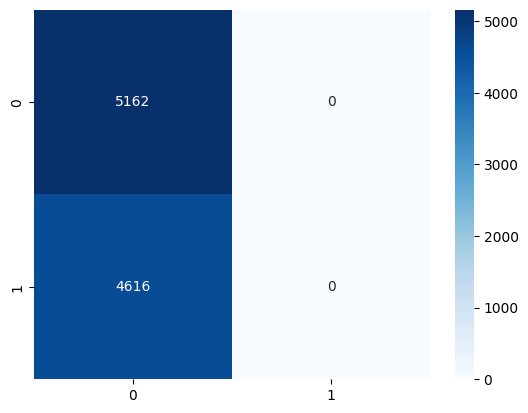

In [ ]:
def avaliar_modelo(nome, y_true, y_pred):
    print(f'\n📊 Resultados — {nome}')
    print('Acurácia:', accuracy_score(y_true, y_pred))
    print('Precisão:', precision_score(y_true, y_pred))
    print('Recall:', recall_score(y_true, y_pred))
    print('F1-score:', f1_score(y_true, y_pred))
    print('\nMatriz de Confusão:')
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

avaliar_modelo('Random Forest', y_test, y_pred_rf)
avaliar_modelo('Deep Learning', y_test, y_pred_dl)


# Artigo 2

## “A Large-Scale Implementation of Predictive Learning Analytics in Higher Education: The Teachers' Role and Perspective”

### Dataset: OULAD (Open University Learning Analytics Dataset)
### Link: https://analyse.kmi.open.ac.uk/open-dataset?utm_source

In [2]:
!pip install pandas numpy scikit-learn seaborn matplotlib tensorflow --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


### ETAPA 2 — Carregar o Dataset

In [7]:
assess = pd.read_csv('/content/drive/MyDrive/Período 3/ia/AV-I/studentAssessment.csv')
info = pd.read_csv('/content/drive/MyDrive/Período 3/ia/AV-I/studentInfo.csv')
vle = pd.read_csv('/content/drive/MyDrive/Período 3/ia/AV-I/studentVle.csv')

print("Shapes:")
print("studentInfo:", info.shape)
print("studentAssessment:", assess.shape)
print("studentVle:", vle.shape)

Shapes:
studentInfo: (32593, 12)
studentAssessment: (173912, 5)
studentVle: (10655280, 6)


### ETAPA 3 — Atributos

In [8]:
# Total de cliques (interações com a plataforma)
clicks = vle.groupby('id_student')['sum_click'].sum().reset_index()
clicks.rename(columns={'sum_click': 'total_clicks'}, inplace=True)

# Média das notas (por aluno)
grades = assess.groupby('id_student')['score'].mean().reset_index()
grades.rename(columns={'score': 'avg_score'}, inplace=True)

# Juntar tudo
df = info.merge(clicks, on='id_student', how='left')
df = df.merge(grades, on='id_student', how='left')

# Criar target (aprovado ou não)
df['final_result'] = df['final_result'].map({
    'Withdrawn': 0,
    'Fail': 0,
    'Pass': 1,
    'Distinction': 1
})

df.dropna(subset=['final_result'], inplace=True)
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_clicks,avg_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,1,934.0,82.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1,1435.0,66.4
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,0,281.0,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,1,2158.0,76.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1,1034.0,54.4


### ETAPA 4 — Pré-processamento e divisão/teste

In [9]:
# Codificar variáveis categóricas
categorical_cols = df.select_dtypes(include='object').columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Separar X e y
X = df.drop(columns=['final_result', 'id_student'])
y = df['final_result']

# Normalizar dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

### ETAPA 5 — Treinar Modelos

In [11]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [12]:
# Deep Learning
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)

y_pred_dl = (model.predict(X_test) > 0.5).astype("int32")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


### ETAPA 6 — Métricas de Desempenho


📊 Random Forest
Acurácia: 0.8224585804868071
Precisão: 0.7796116504854369
Recall: 0.8698006932409013
F1: 0.8222404259676428

Relatório:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      5162
           1       0.78      0.87      0.82      4616

    accuracy                           0.82      9778
   macro avg       0.82      0.82      0.82      9778
weighted avg       0.83      0.82      0.82      9778



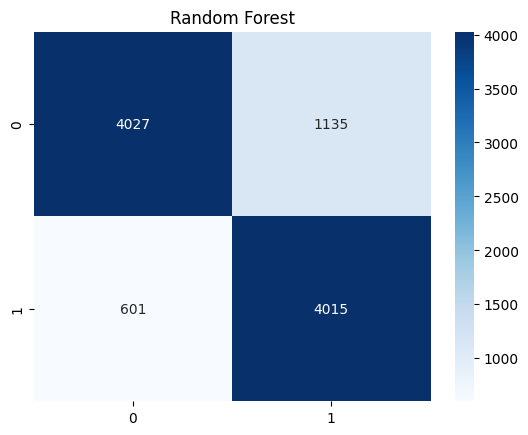


📊 Deep Learning
Acurácia: 0.5279198200040908
Precisão: 0.0
Recall: 0.0
F1: 0.0

Relatório:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      5162
           1       0.00      0.00      0.00      4616

    accuracy                           0.53      9778
   macro avg       0.26      0.50      0.35      9778
weighted avg       0.28      0.53      0.36      9778



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

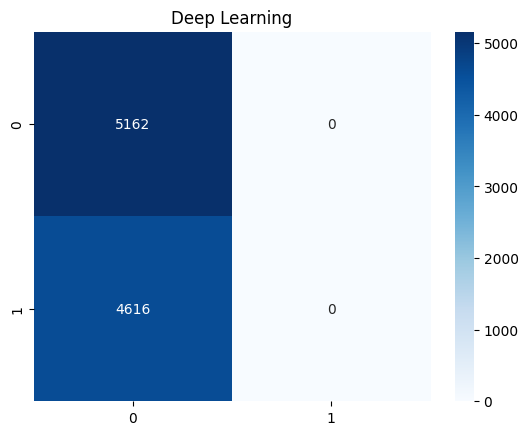

In [13]:
def avaliar(nome, y_true, y_pred):
    print(f"\n📊 {nome}")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Precisão:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1:", f1_score(y_true, y_pred))
    print("\nRelatório:")
    print(classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(nome)
    plt.show()

avaliar("Random Forest", y_test, y_pred_rf)
avaliar("Deep Learning", y_test, y_pred_dl)


In [ ]:
# O caminho é
# /content/drive/MyDrive/Período 3/ia/AV-I/studentInfo.csv
# /content/drive/MyDrive/Período 3/ia/AV-I/studentVle.csv